## Title Cell

In [3]:
# Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import csv, convert to a dataframe. List the columns so we know how to clean it up
diabetes_csv = pd.read_csv("source_data/diabetes_indicators.csv")
diabetes_df = pd.DataFrame(diabetes_csv)
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## William

In [6]:
# Trim the dataframe so it is only our variables of interest
df_trimmed = diabetes_df[["Diabetes_012", "Income", "Education", "Age", "HvyAlcoholConsump", "Fruits", "Veggies", "CholCheck", "HighChol", "PhysActivity", "BMI"]].copy()
df_trimmed.head()

,Diabetes_012,Income,Education,Age,HvyAlcoholConsump,Fruits,Veggies,CholCheck,HighChol,PhysActivity,BMI
0,0.0,3.0,4.0,9.0,0.0,0.0,1.0,1.0,1.0,0.0,40.0
1,0.0,1.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
2,0.0,8.0,4.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0,28.0
3,0.0,6.0,3.0,11.0,0.0,1.0,1.0,1.0,0.0,1.0,27.0
4,0.0,4.0,5.0,11.0,0.0,1.0,1.0,1.0,1.0,1.0,24.0


In [7]:
# Group by fruit consumption and diabetes status, count the number of participants for each category
dia_fruits = df_trimmed.groupby(["Fruits", "Diabetes_012"]).size().reset_index(name='count')

# ***(I think we could also use a .loc here to make it easier - but this works)***
# Separate 0 fruit values from 1 fruit values, copying the tables so we can easily perform actions on them
nofruits = dia_fruits[dia_fruits["Fruits"] == 0].copy()
yesfruits = dia_fruits[dia_fruits["Fruits"] == 1].copy()

# Find the total respondents per category (fruit and no fruit)
# Create a new column for the proportion of respondents in each row out of their respective category
nofruits_sum = nofruits["count"].sum()
nofruits["proportion"] = (nofruits["count"] / nofruits_sum) * 100

yesfruits_sum = yesfruits["count"].sum()
yesfruits["proportion"] = (yesfruits["count"] / yesfruits_sum) * 100

# Using the pd.concat() function, combine the two tables into the new fruitstack df, which shows the proportions
fruitstack = pd.concat([nofruits, yesfruits], ignore_index=False)
fruitstack

,Fruits,Diabetes_012,count,proportion
0,0.0,0.0,76287,82.221767
1,0.0,1.0,1842,1.985299
2,0.0,2.0,14653,15.792934
3,1.0,0.0,137416,85.405661
4,1.0,1.0,2789,1.733396
5,1.0,2.0,20693,12.860943


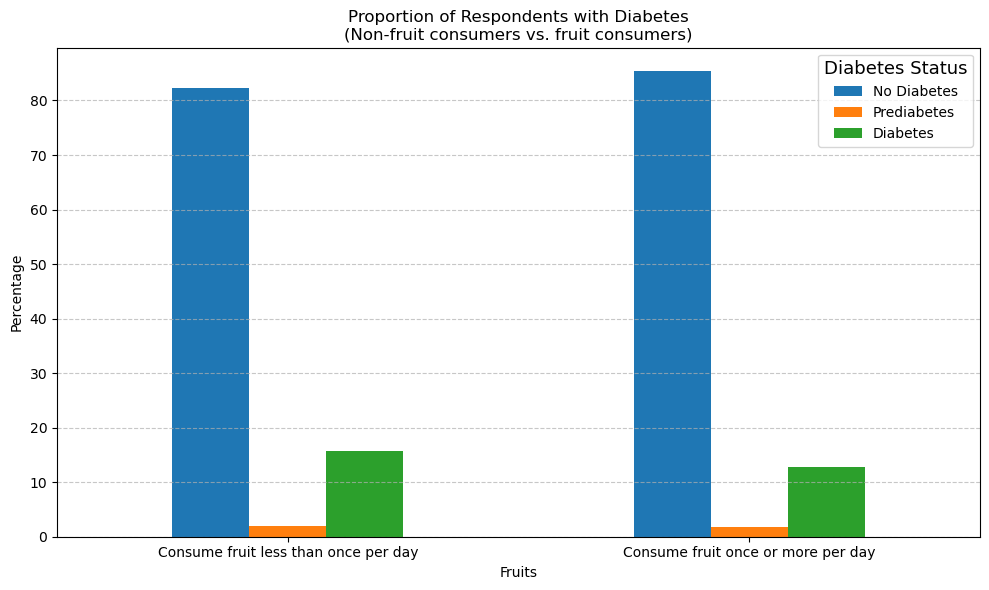

In [8]:
# Set up pivot table to reorganize fruitstack df
pivot_df = fruitstack.pivot(index='Fruits', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {0.0: 'Consume fruit less than once per day', 1.0: 'Consume fruit once or more per day'}
pivot_df.index = pivot_df.index.map(index_mapping)

# Plot the table
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Respondents with Diabetes\n(Non-fruit consumers vs. fruit consumers)')
plt.xlabel('Fruits')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Chinna

In [60]:
# Group by PhysActivity and diabetes status, count the number of participants for each category
dia_PhysActivity = df_trimmed.groupby(["PhysActivity", "Diabetes_012"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity = dia_PhysActivity[dia_PhysActivity["PhysActivity"] == 0].copy()
yes_PhysActivity = dia_PhysActivity[dia_PhysActivity["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum = no_PhysActivity["count"].sum()
no_PhysActivity["proportion"] = (no_PhysActivity["count"] / no_PhysActivity_sum) * 100

yes_PhysActivity_sum = yes_PhysActivity["count"].sum()
yes_PhysActivity["proportion"] = (yes_PhysActivity["count"] / yes_PhysActivity_sum) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack = pd.concat([no_PhysActivity, yes_PhysActivity], ignore_index=False)
PhysActivitystack

,PhysActivity,Diabetes_012,count,proportion
0,0.0,0.0,47212,76.444301
1,0.0,1.0,1489,2.410946
2,0.0,2.0,13059,21.144754
3,1.0,0.0,166491,86.750208
4,1.0,1.0,3142,1.637140
5,1.0,2.0,22287,11.612651


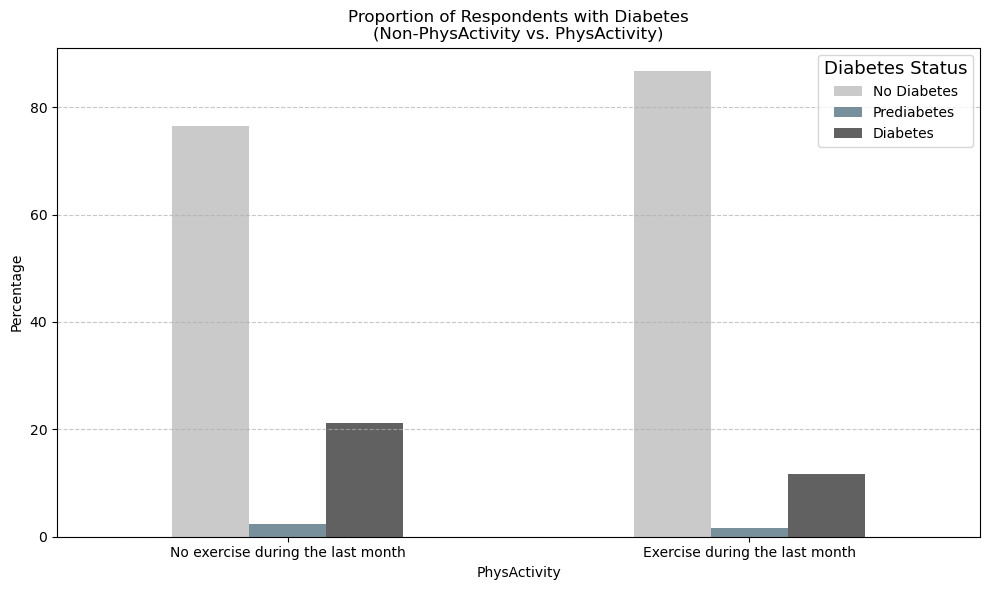

In [68]:
# Set up pivot table to reorganize PhysActivity df
PhysActivity_pivot_df = PhysActivitystack.pivot(index='PhysActivity', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
PhysActivity_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {0.0: 'No exercise during the last month', 1.0: 'Exercise during the last month'}
PhysActivity_pivot_df.index = PhysActivity_pivot_df.index.map(index_mapping)

# Plot the table
colors = ['#CACACA','#78909C','#616161']
PhysActivity_pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Proportion of Respondents with Diabetes\n(Non-PhysActivity vs. PhysActivity)')
plt.xlabel('PhysActivity')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(PhysActivity_pivot_df.index)), labels=PhysActivity_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

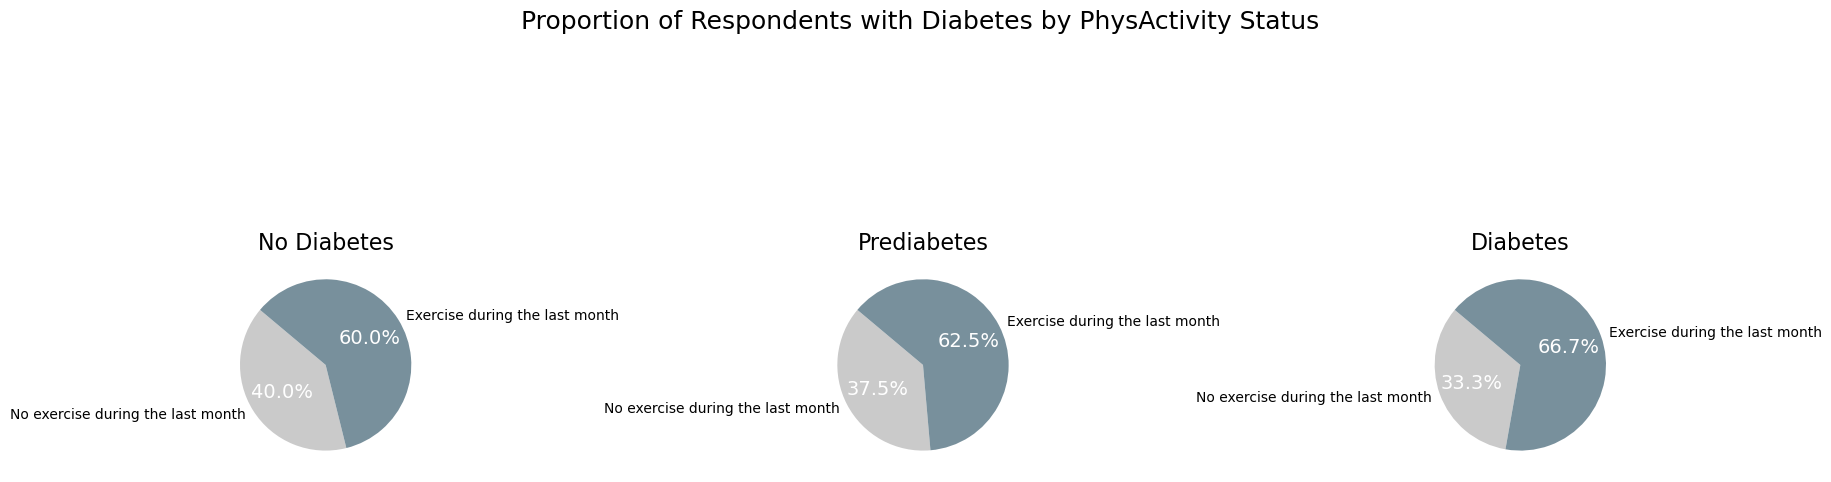

In [66]:

# PhysActivity Pie Chart

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Define colors
colors = ['#CACACA','#78909C','#616161']

for i, column in enumerate(PhysActivity_pivot_df.columns):
    wedges, texts, autotexts = axes[i].pie(
        PhysActivity_pivot_df[column],
        labels=PhysActivity_pivot_df.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(PhysActivity_pivot_df.index)]  # Adjust colors to match number of slices
    )
    axes[i].set_title(column, fontsize=16, color='black')  # Title font size and color

    # Adjust font size and color for pie chart labels and percentages
    for text in texts:
        text.set_fontsize(10)
        text.set_color('black')  # Set color of pie chart labels
    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_color('white')  # Set color of percentages

plt.suptitle('Proportion of Respondents with Diabetes by PhysActivity Status', fontsize=18)


plt.tight_layout()
plt.show()


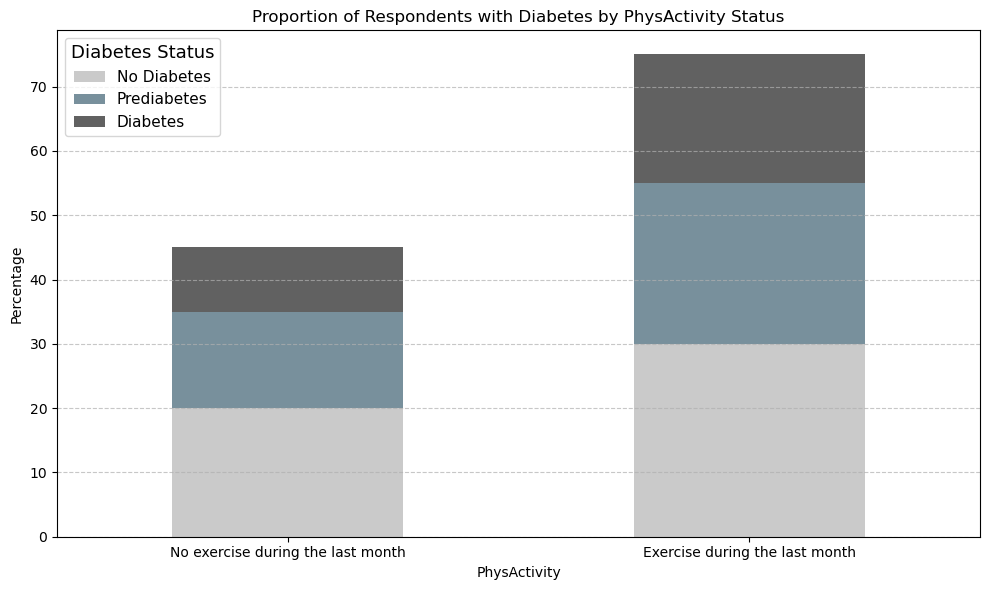

In [64]:
#stacked bar chart PhysActivity

#stacked bar chart PhysActivity
data = {
    'No Diabetes': [20, 30],
    'Prediabetes': [15, 25],
    'Diabetes': [10, 20]
}
PhysActivity_pivot_df = pd.DataFrame(data, index=['No exercise during the last month', 'Exercise during the last month'])

# Define colors for each segment
colors = ['#CACACA','#78909C','#616161']

# Plotting the stacked bar chart
ax = PhysActivity_pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Proportion of Respondents with Diabetes by PhysActivity Status')
plt.xlabel('PhysActivity')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(PhysActivity_pivot_df.index)), labels=PhysActivity_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

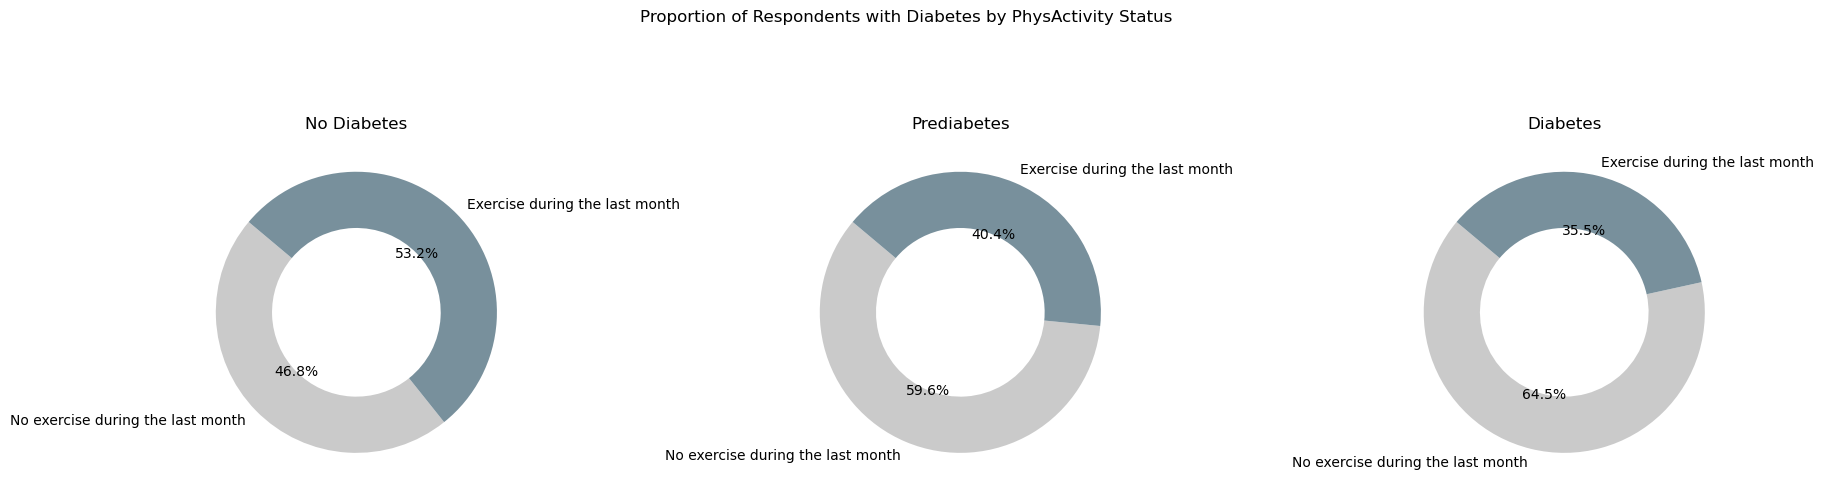

In [78]:
#Doughnut Chart 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['#CACACA','#78909C','#616161']
for i, column in enumerate(PhysActivity_pivot_df.columns):
    wedges, texts, autotexts = axes[i].pie(PhysActivity_pivot_df[column], labels=PhysActivity_pivot_df.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), colors=colors)
    axes[i].set_title(column)

plt.suptitle('Proportion of Respondents with Diabetes by PhysActivity Status')
plt.tight_layout()
plt.show()

In [48]:
#Chi square solution PhysActivity

# Example data for demonstration
data = {
    'PhysActivity': ['No exercise during the last month', 'Exercise during the last month'],
    'No Diabetes': [50, 30],
    'Prediabetes': [20, 15],
    'Diabetes': [10, 25]
}

PhysActivitystack = pd.DataFrame(data)
PhysActivitystack.set_index('PhysActivity', inplace=True)


from scipy.stats import chi2_contingency

# Prepare contingency table for Chi-Square test
contingency_table01 = PhysActivitystack.T  # Transpose to get counts in columns

contingency_table01



PhysActivity,No exercise during the last month,Exercise during the last month
No Diabetes,50,30
Prediabetes,20,15
Diabetes,10,25


In [49]:
# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table01)

# Output the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(ex)
if p_val > 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.")
else:
        print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.")

Chi-Square Statistic: 11.52742346938776
P-Value: 0.0031394371877609584
Degrees of Freedom: 2
Expected Frequencies:
[[42.66666667 37.33333333]
 [18.66666667 16.33333333]
 [18.66666667 16.33333333]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.


In [54]:
#Fixed Chi-Square test/ updated percentage to correct count value.


# Create a contingency table
contingency_table02 = pd.crosstab(df_trimmed['Diabetes_012'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table02.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table02.index = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table01)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Diabetes Status.")
else:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Diabetes Status.")

contingency_table02



Chi-Square Statistic: 11.52742346938776
P-Value: 0.0031394371877609584
Degrees of Freedom: 2
Expected Frequencies Table:
[[42.66666667 37.33333333]
 [18.66666667 16.33333333]
 [18.66666667 16.33333333]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Diabetes Status.


,No exercise during the last month,Exercise during the last month
No Diabetes,47212,166491
Prediabetes,1489,3142
Diabetes,13059,22287


In [17]:
#PhysActivity to Income
# Group by PhysActivity and Income, count the number of participants for each category
dia_PhysActivity_Income = df_trimmed.groupby(["PhysActivity", "Income"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Income = dia_PhysActivity_Income[dia_PhysActivity_Income["PhysActivity"] == 0].copy()
yes_PhysActivity_Income = dia_PhysActivity_Income[dia_PhysActivity_Income["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Income = no_PhysActivity_Income["count"].sum()
no_PhysActivity_Income["proportion"] = (no_PhysActivity_Income["count"] / no_PhysActivity_sum_Income) * 100

yes_PhysActivity_sum_Income = yes_PhysActivity_Income["count"].sum()
yes_PhysActivity_Income["proportion"] = (yes_PhysActivity_Income["count"] / yes_PhysActivity_sum_Income) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Income = pd.concat([no_PhysActivity_Income, yes_PhysActivity_Income], ignore_index=False)
PhysActivitystack_Income





,PhysActivity,Income,count,proportion
0,0.0,1.0,3892,6.301813
1,0.0,2.0,4699,7.608484
2,0.0,3.0,5941,9.619495
3,0.0,4.0,6889,11.154469
4,0.0,5.0,7865,12.734780
5,0.0,6.0,9638,15.605570
6,0.0,7.0,9391,15.205635
7,0.0,8.0,13445,21.769754
8,1.0,1.0,5919,3.084098
9,1.0,2.0,7084,3.691121


<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\cchea\AppData\Local\Temp\ipykernel_4736\1627233602.py:15: SyntaxWarning: invalid escape sequence '\$'
  ax.set_xticklabels(['Less than \$10k', '\$10k to \$15k', '\$15k to \$20

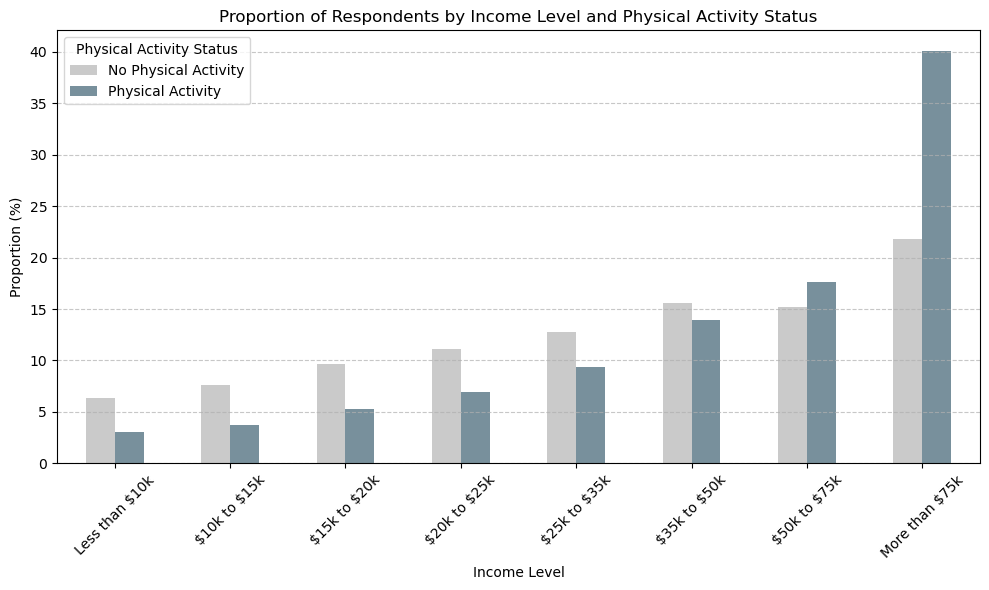

In [80]:
PhysActivity_pivot_Income = PhysActivitystack_Income.pivot(index='Income', columns='PhysActivity', values='proportion')
colors = ['#CACACA','#78909C','#616161']
# Rename columns for clarity
PhysActivity_pivot_Income.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Income.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Income Level and Physical Activity Status')
plt.xlabel('Income Level')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['Less than \$10k', '\$10k to \$15k', '\$15k to \$20k', '\$20k to \$25k', '\$25k to \$35k', '\$35k to \$50k', '\$50k to \$75k', 'More than \$75k'], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [82]:
#PhysActivity to Age
# Group by PhysActivity and Age, count the number of participants for each category
dia_PhysActivity_Age = df_trimmed.groupby(["PhysActivity", "Age"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Age = dia_PhysActivity_Age[dia_PhysActivity_Age["PhysActivity"] == 0].copy()
yes_PhysActivity_Age = dia_PhysActivity_Age[dia_PhysActivity_Age["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Age = no_PhysActivity_Age["count"].sum()
no_PhysActivity_Age["proportion"] = (no_PhysActivity_Age["count"] / no_PhysActivity_sum_Age) * 100

yes_PhysActivity_sum_Age = yes_PhysActivity_Age["count"].sum()
yes_PhysActivity_Age["proportion"] = (yes_PhysActivity_Age["count"] / yes_PhysActivity_sum_Age) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Age = pd.concat([no_PhysActivity_Age, yes_PhysActivity_Age], ignore_index=False)
PhysActivitystack_Age



,PhysActivity,Age,count,proportion
0,0.0,1.0,749,1.212759
1,0.0,2.0,1185,1.918718
2,0.0,3.0,1952,3.160622
3,0.0,4.0,2759,4.467293
4,0.0,5.0,3385,5.480894
5,0.0,6.0,4451,7.206930
6,0.0,7.0,6380,10.330311
7,0.0,8.0,7707,12.478951
8,0.0,9.0,8357,13.531412
9,0.0,10.0,7956,12.882124


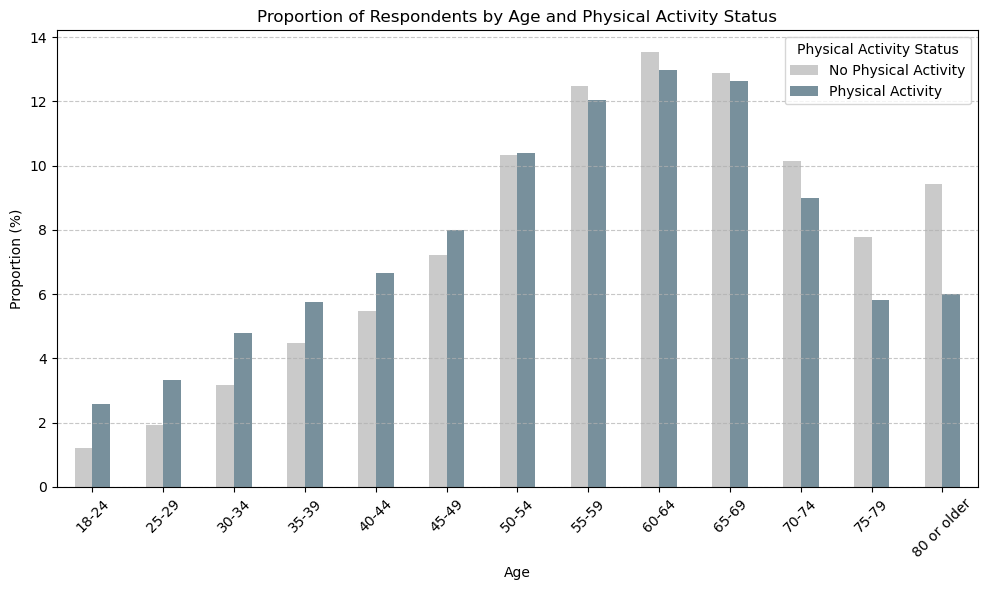

In [84]:
PhysActivity_pivot_Age = PhysActivitystack_Age.pivot(index='Age', columns='PhysActivity', values='proportion')

# Rename columns for clarity
PhysActivity_pivot_Age.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Age.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Age and Physical Activity Status')
plt.xlabel('Age')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older' ], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [34]:
#PhysActivity to Education
# Group by PhysActivity and Education, count the number of participants for each category
dia_PhysActivity_Education = df_trimmed.groupby(["PhysActivity", "Education"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Education = dia_PhysActivity_Education[dia_PhysActivity_Education["PhysActivity"] == 0].copy()
yes_PhysActivity_Education = dia_PhysActivity_Education[dia_PhysActivity_Education["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Education = no_PhysActivity_Education["count"].sum()
no_PhysActivity_Education["proportion"] = (no_PhysActivity_Education["count"] / no_PhysActivity_sum_Education) * 100

yes_PhysActivity_sum_Education = yes_PhysActivity_Education["count"].sum()
yes_PhysActivity_Education["proportion"] = (yes_PhysActivity_Education["count"] / yes_PhysActivity_sum_Education) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Education = pd.concat([no_PhysActivity_Education, yes_PhysActivity_Education], ignore_index=False)
PhysActivitystack_Education


,PhysActivity,Education,count,proportion
0,0.0,1.0,79,0.127915
1,0.0,2.0,1742,2.820596
2,0.0,3.0,4119,6.669365
3,0.0,4.0,21163,34.266516
4,0.0,5.0,18027,29.188795
5,0.0,6.0,16630,26.926813
6,1.0,1.0,95,0.049500
7,1.0,2.0,2301,1.198937
8,1.0,3.0,5359,2.792309
9,1.0,4.0,41587,21.668925


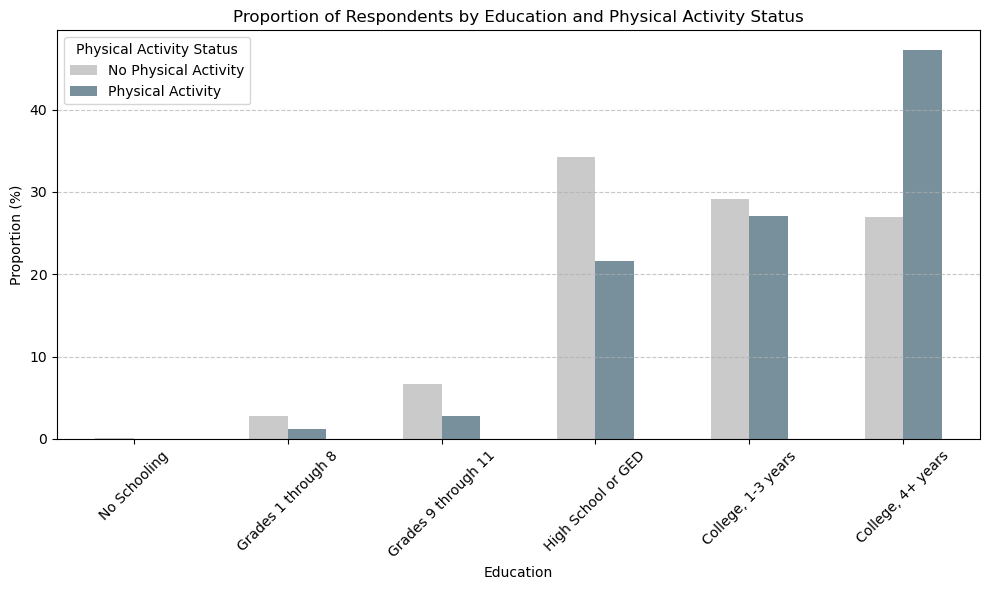

In [88]:
PhysActivity_pivot_Education = PhysActivitystack_Education.pivot(index='Education', columns='PhysActivity', values='proportion')

# Rename columns for clarity
PhysActivity_pivot_Education.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Education.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Education and Physical Activity Status')
plt.xlabel('Education')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['No Schooling', 'Grades 1 through 8', 'Grades 9 through 11', 'High School or GED', 'College, 1-3 years', 'College, 4+ years'], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [105]:
# Create a contingency table
contingency_table03 = pd.crosstab(df_trimmed['Income'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table03.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table03.index = ['Less than \$10k', '\$10k to \$15k', '\$15k to \$20k', '\$20k to \$25k', '\$25k to \$35k', '\$35k to \$50k', '\$50k to \$75k', 'More than \$75k']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table03)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Income range.")

contingency_table03

Chi-Square Statistic: 10442.361605055385
P-Value: 0.0
Degrees of Freedom: 7
Expected Frequencies Table:
[[ 2388.54998423  7422.45001577]
 [ 2868.64585304  8914.35414696]
 [ 3893.84042889 12100.15957111]
 [ 4901.99306213 15233.00693787]
 [ 6301.38000631 19581.61999369]
 [ 8878.85209713 27591.14790287]
 [10521.93882056 32697.06117944]
 [22004.79974771 68380.20025229]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\cchea\AppData\Local\Temp\ipykernel_4736\3813686853.py:6: SyntaxWarning: invalid escape sequence '\$'
  contingency_table03.index = ['Less than \$10k', '\$10k to \$15k', '\$15k to \$20k', '\$2

,No exercise during the last month,Exercise during the last month
Less than \$10k,3892,5919
\$10k to \$15k,4699,7084
\$15k to \$20k,5941,10053
\$20k to \$25k,6889,13246
\$25k to \$35k,7865,18018
\$35k to \$50k,9638,26832
\$50k to \$75k,9391,33828
More than \$75k,13445,76940


In [107]:
contingency_table04 = pd.crosstab(df_trimmed['Age'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table04.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table04.index = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table04)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Age range.")

contingency_table04

Chi-Square Statistic: 2421.66641023268
P-Value: 0.0
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 1387.70104068  4312.29895932]
 [ 1849.7811416   5748.2188584 ]
 [ 2707.96467991  8415.03532009]
 [ 3365.29675181 10457.70324819]
 [ 3933.52380952 12223.47619048]
 [ 4825.06086408 14993.93913592]
 [ 6406.30968149 19907.69031851]
 [ 7506.24534847 23325.75465153]
 [ 8093.46199937 25150.53800063]
 [ 7837.8328603  24356.1671397 ]
 [ 5729.25764743 17803.74235257]
 [ 3890.43204037 12089.56795963]
 [ 4227.13213497 13135.86786503]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.


,No exercise during the last month,Exercise during the last month
18-24,749,4951
25-29,1185,6413
30-34,1952,9171
35-39,2759,11064
40-44,3385,12772
45-49,4451,15368
50-54,6380,19934
55-59,7707,23125
60-64,8357,24887
65-69,7956,24238


In [109]:
contingency_table05 = pd.crosstab(df_trimmed['Education'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table05.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table05.index = ['No Schooling', 'Grades 1 through 8', 'Grades 9 through 11', 'High School or GED', 'College, 1-3 years', 'College, 4+ years']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table05)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Education range.")

contingency_table05

Chi-Square Statistic: 10333.653326418636
P-Value: 0.0
Degrees of Freedom: 5
Expected Frequencies Table:
[[4.23614002e+01 1.31638600e+02]
 [9.84293914e+02 3.05870609e+03]
 [2.30747903e+03 7.17052097e+03]
 [1.52768843e+04 4.74731157e+04]
 [1.70200315e+04 5.28899685e+04]
 [2.61289499e+04 8.11960501e+04]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.


,No exercise during the last month,Exercise during the last month
No Schooling,79,95
Grades 1 through 8,1742,2301
Grades 9 through 11,4119,5359
High School or GED,21163,41587
"College, 1-3 years",18027,51883
"College, 4+ years",16630,90695


## Abigail

## Muad

## Sophia

## Conclusions and Bonus Workspace